<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Прежде чем приступать к основной части проекта изучим содержимое архива.

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

С первого взгляда видны несколько проблем: а) столбец is_apartment, который должен быть булева типа, хранит значения типа object, и в нем имеются пустые значения, б) столбец balcony имеет тип float, который лучше заменить на int (число балконов не может быть не целым), стоит заменить в этом столбце пустые значения на 0.

## Предобработка данных

Исправим проблемы, описанные в пункте 1.1

In [3]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заполняем пустые значения False (считаем, что пустое значение = квартира - не аппартаменты)
data['is_apartment'] = data['is_apartment'].astype('bool') #переводим тип данных
data['balcony'] = data['balcony'].fillna(0)  #заполняем пустые значения
data['balcony'] = data['balcony'].astype('int') #переводим тип данных

display(data.head())
data.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Ещё, как мне кажется, стоит изменить тип столбца floors_total на int, но это нельзя сделать пока есть пустые значения, а заполнять их, я думаю, не стоит, иначе может получиться ситуация: человек приезжает покупать квартиру в 10-этажке, а на самом деле там не среднее или медианное значение этажей, а уникальное (например 1 или 100).

Была найдена еще одна проблема: названия некоторых населенных пунктов совпадают (различаются написанием).

In [4]:
print(len(data['locality_name'].unique())) #смотрим количество уникальных значений
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #заменяем ё на е
print(len(data['locality_name'].unique())) #проверяем количество уникальных значений

365
331


Заполним значения airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, ponds_around3000, parks_around3000 средними значениями.

In [5]:
for i in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'ponds_around3000', 'parks_around3000']:
    print('Пустые строки в стобце',i,' до:',data[i].isna().sum())
    for j in data['locality_name'].unique():
        temp = data[data['locality_name'] == j]
        f = temp[i].mean()
        data.loc[data['locality_name'] == j, i] = data[i].fillna(f)
    print('Пустые строки в стобце',i,' после:',data[i].isna().sum())

data['ponds_around3000'] = data['ponds_around3000'].round()
data['parks_around3000'] = data['parks_around3000'].round()
display(data.head())
data.info()

Пустые строки в стобце airports_nearest  до: 5542
Пустые строки в стобце airports_nearest  после: 4872
Пустые строки в стобце cityCenters_nearest  до: 5519
Пустые строки в стобце cityCenters_nearest  после: 4872
Пустые строки в стобце parks_nearest  до: 15620
Пустые строки в стобце parks_nearest  после: 6032
Пустые строки в стобце ponds_nearest  до: 14589
Пустые строки в стобце ponds_nearest  после: 4996
Пустые строки в стобце ponds_around3000  до: 5518
Пустые строки в стобце ponds_around3000  после: 4872
Пустые строки в стобце parks_around3000  до: 5518
Пустые строки в стобце parks_around3000  после: 4872


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра каждой квартиры.

In [6]:
data['price_for_square_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0,100000.000000


Найдем день недели, месяц и год публикации объявлений.

In [7]:
data['date'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = pd.DatetimeIndex(data['date']).weekday
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,date,weekday,month,year
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.000000,NaN,120370.370370,2019-03-07,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,573.217105,81.0,82920.792079,2018-12-04,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.000000,558.0,92785.714286,2015-08-20,3,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.000000,424.0,408176.100629,2015-07-24,4,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.000000,121.0,100000.000000,2018-06-19,1,6,2018


Определим номер этажа.

In [8]:
def floor_c(temp):
    if temp['floor'] == 1:
        return 'первый'
    elif temp['floor'] == temp['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_c, axis=1)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,date,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,482.000000,2.0,755.000000,NaN,120370.370370,2019-03-07,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,NaN,0.0,573.217105,81.0,82920.792079,2018-12-04,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,90.000000,2.0,574.000000,558.0,92785.714286,2015-08-20,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,84.000000,3.0,234.000000,424.0,408176.100629,2015-07-24,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,112.000000,1.0,48.000000,121.0,100000.000000,2018-06-19,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,2018-09-10,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,501.100000,0.0,598.071429,155.0,99195.710456,2017-11-02,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,498.597886,0.0,520.213955,NaN,110544.692737,2019-04-18,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,NaN,2.0,133.000000,189.0,87454.764777,2018-05-23,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,498.597886,0.0,520.213955,289.0,88524.590164,2017-02-26,6,2,2017,другой


Найдем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [9]:
data['living/total'] = data['living_area'] / data['total_area']
data['kitchen/total'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,date,weekday,month,year,floor_type,living/total,kitchen/total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,755.000000,NaN,120370.370370,2019-03-07,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,573.217105,81.0,82920.792079,2018-12-04,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,574.000000,558.0,92785.714286,2015-08-20,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,234.000000,424.0,408176.100629,2015-07-24,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,48.000000,121.0,100000.000000,2018-06-19,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

Изучим содержимое столбцов площади, цены, числа комнат и высоты потолков.

In [10]:
print(data['total_area'].unique())
print(data['last_price'].unique())
print(data['rooms'].unique())
data['ceiling_height'].unique()

[108.    40.4   56.   ...  66.86 133.81  76.75]
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В значениях высоты потолков есть аномально высокие значения.

Построим гистограммы для площади, цены, числа комнат и высоты потолков.

<AxesSubplot:>

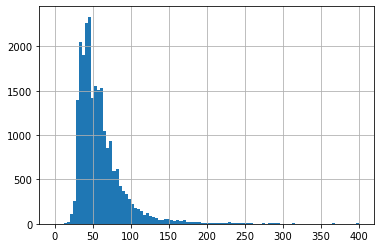

In [11]:
data['total_area'].hist(bins=100, range=(0, 400), grid=True)

Откинем значения больше 200.

0.009578463226296468


<AxesSubplot:>

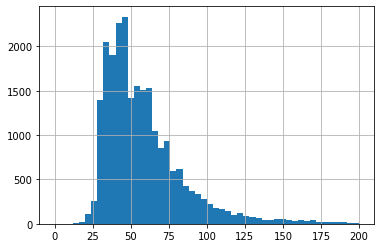

In [12]:
print(len(data.query('total_area > 200')['total_area']) / len(data['total_area']))
data['total_area'] = data.query('total_area < 200')['total_area']
data['total_area'].hist(bins=50, range=(0, 200), grid=True)

<AxesSubplot:>

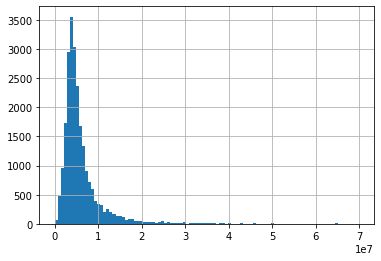

In [13]:
data['last_price'].hist(bins=100, range=(0, 70000000), grid=True)

Откинем значения больше 20000000.

0.02983248238322292


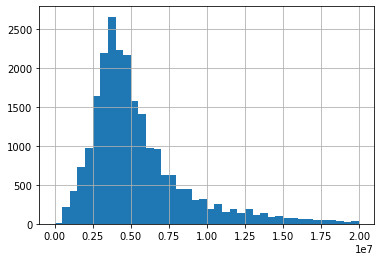

In [14]:
print(len(data.query('last_price > 20000000')['last_price']) / len(data['last_price']))
data['last_price'] = data.query('last_price < 20000000')['last_price']
data['last_price'].hist(bins=40, range=(0, 20000000), grid=True);

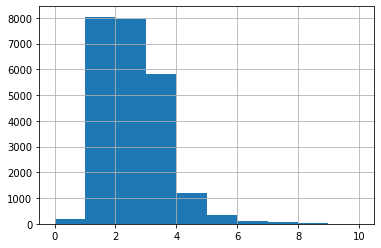

In [15]:
data['rooms'].hist(bins=10, range=(0, 10), grid=True);

Откинем значения больше 6.

0.00379762859192371


<AxesSubplot:>

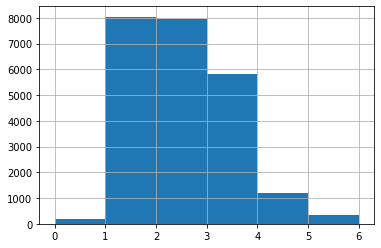

In [16]:
print(len(data.query('rooms > 6')['rooms']) / len(data['rooms']))
data['rooms'] = data.query('rooms < 6')['rooms']
data['rooms'].hist(bins=6, range=(0, 6), grid=True)

<AxesSubplot:>

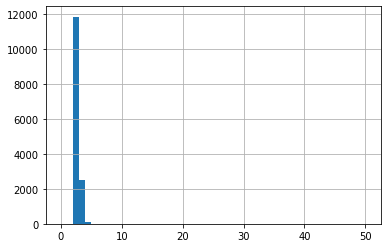

In [17]:
data['ceiling_height'].hist(bins=50, range=(0, 50), grid=True)

Откинем значения больше 8.

0.0010970927043335162


<AxesSubplot:>

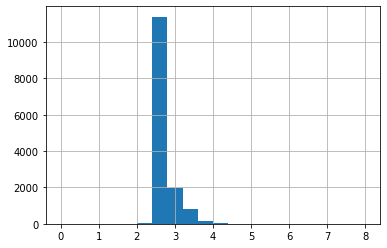

In [18]:
print(len(data.query('ceiling_height > 8')['ceiling_height']) / len(data['ceiling_height']))
data['ceiling_height'] = data.query('ceiling_height < 8')['ceiling_height']
data['ceiling_height'].hist(bins=20, range=(0, 8), grid=True)

Построим гистограмму времени продажи квартиры, посчитаем среднее и медиану.

<AxesSubplot:>

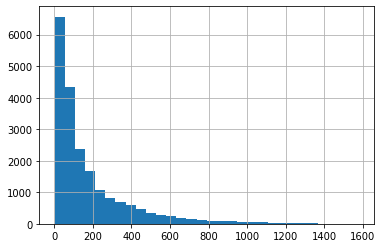

In [19]:
data['days_exposition'].hist(bins=30, grid=True)

In [20]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно квартиру продают в течение 95 дней. При этом, если квартиру продали за 45 дней - это очень быстро, а дольше чем за 232 дня - очень медленно.
Отбросим значения больше 800 и меньше 10.

In [21]:
print(data.query('days_exposition < 800 & days_exposition > 10')['days_exposition'].describe())

count    18667.000000
mean       165.914662
std        165.583409
min         11.000000
25%         45.000000
50%        101.000000
75%        225.000000
max        799.000000
Name: days_exposition, dtype: float64


Медиана почти не изменилась, а вот среднее уменьшилось на половину месяца.

Найдем связь между ценой квартиры и остальными данными.

0.7740478124365512
0.4910317744907301
-0.3689657547549987


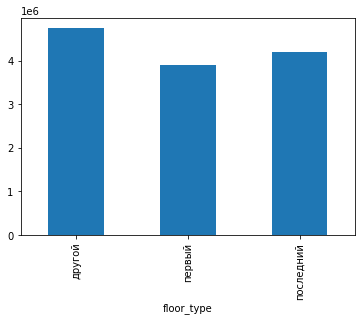

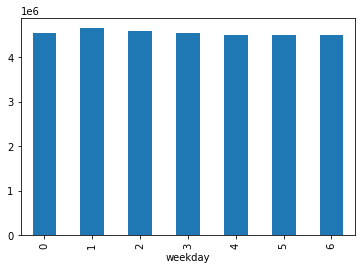

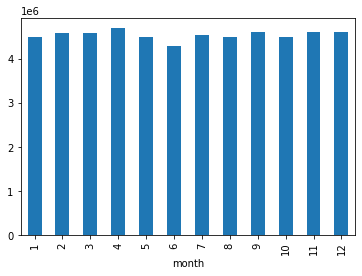

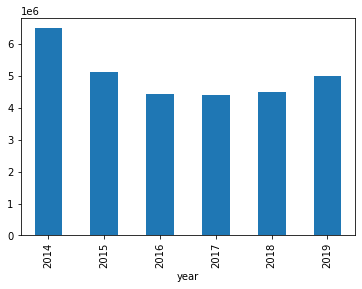

In [22]:
print(data['last_price'].corr(data['total_area']))
print(data['last_price'].corr(data['rooms']))
print(data['last_price'].corr(data['cityCenters_nearest']))
data.groupby('floor_type')['last_price'].median().plot(x='floor_type', y='last_price', kind='bar')
plt.show()
data.groupby('weekday')['last_price'].median().plot(x='weekday', y='last_price', kind='bar')
plt.show()
data.groupby('month')['last_price'].median().plot(x='month', y='last_price', kind='bar')
plt.show()
data.groupby('year')['last_price'].median().plot(x='year', y='last_price', kind='bar')
plt.show()

Цена квартиры повышается с увеличением площади, уменьшением расстояния до центра и увеличением количества комнат. Причем увеличение площади влияет сильнее, чем расстояние до центра, которое в свою очередь влияет сильнее, чем количество комнат.
Цена квартир на первом этаже является наименьшей, при этом квартиры на "других" этажах в среднем дороже. Но при этом зависимотси роста/падения цены от роста этажа практически не наблюдается.
День недели, месяц и год продажи почти никак не влияют на цену квартиры. Единственное - в 2014 году квартиры в среднем были самыми дорогими.

Найдем самые "популярные" населенные пункты и посчитаем среднюю цену кв. м для каждого.

In [23]:
data.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: total_images, dtype: int64

In [24]:
for i in ['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары',
          'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина',
         'деревня Кудрово', 'Выборг']:
    print(i,':',data.query('locality_name == @i')['price_for_square_meter'].mean())

Санкт-Петербург : 114849.00879387381
поселок Мурино : 85681.76260114639
поселок Шушары : 78677.3642167513
Всеволожск : 68654.4739860316
Пушкин : 103125.81929072196
Колпино : 75424.57909803945
поселок Парголово : 90175.91345801107
Гатчина : 68746.14676333922
деревня Кудрово : 92473.54757579972
Выборг : 58141.90915331862


Самые дорогие квартиры в Санкт-Петербурге и Пушкине, самые дешевые в Всеволжске, Гатчине и Выборге.

Найдем квартиры в центре Санкт-Петербурга.

centre_km
0.0    5.288148e+06
1.0    8.319687e+06
2.0    8.197068e+06
3.0    8.350673e+06
4.0    8.330163e+06
dtype: float64


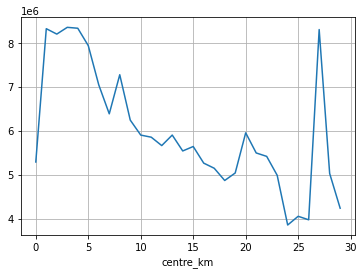

In [25]:
data['centre_km'] = (data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'] / 1000).round()
temp = data[data['locality_name'] == 'Санкт-Петербург'].groupby('centre_km')['last_price'].sum() / data[data['locality_name'] == 'Санкт-Петербург'].groupby('centre_km')['centre_km'].count()
print(temp.head()) #нашли суммы цен для каждого километра Петербурга и количество квартир на каждый километр и поделили
temp.plot(grid=True);




Судя по всему, центром считается расстояние до 5 км.

Найдем различие между квартирами в центре и общим набором квартир.

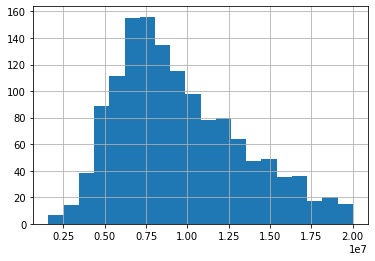

In [26]:
data.query('centre_km < 5')['last_price'].hist(bins=20, grid=True);

0.4676073266710353

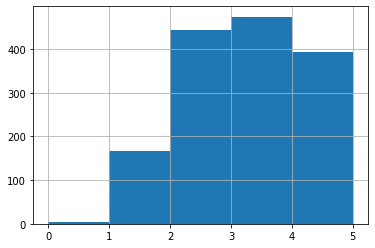

In [27]:
data.query('centre_km < 5')['rooms'].hist(bins=5, grid=True)
data.query('centre_km < 5')['rooms'].corr(data.query('centre_km < 5')['last_price'])

0.6945770293019694

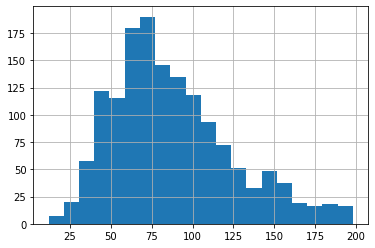

In [28]:
data.query('centre_km < 5')['total_area'].hist(bins=20, grid=True)
data.query('centre_km < 5')['total_area'].corr(data.query('centre_km < 5')['last_price'])

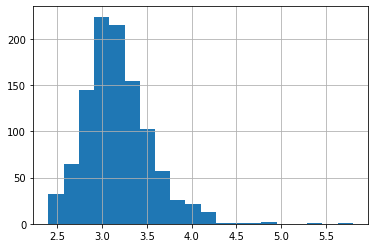

In [29]:
data.query('centre_km < 5')['ceiling_height'].hist(bins=20, grid=True);

-0.08175428076649627
0.11630081086459002


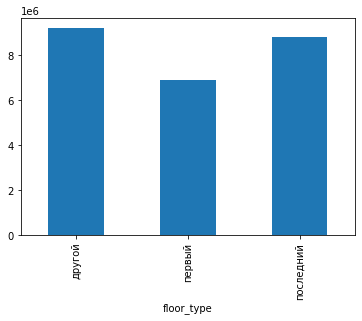

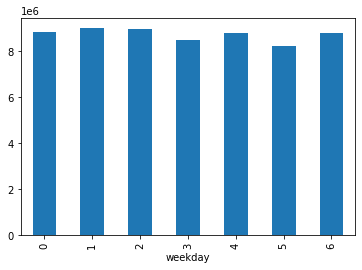

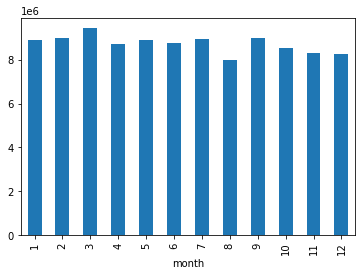

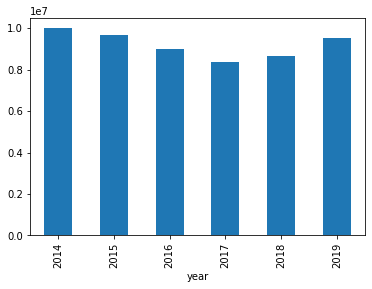

In [30]:
print(data.query('centre_km < 5')['cityCenters_nearest'].corr(data.query('centre_km < 5')['last_price']))
print(data.query('centre_km < 5')['floor'].corr(data.query('centre_km < 5')['last_price']))
data.query('centre_km < 5').groupby('floor_type')['last_price'].median().plot(x='floor_type', y='last_price', kind='bar')
plt.show()
data.query('centre_km < 5').groupby('weekday')['last_price'].median().plot(x='weekday', y='last_price', kind='bar')
plt.show()
data.query('centre_km < 5').groupby('month')['last_price'].median().plot(x='month', y='last_price', kind='bar')
plt.show()
data.query('centre_km < 5').groupby('year')['last_price'].median().plot(x='year', y='last_price', kind='bar')
plt.show()

Сравним количество комнат, цену, площадь и высоту потолков для квартир в центре и по всему набору данных.

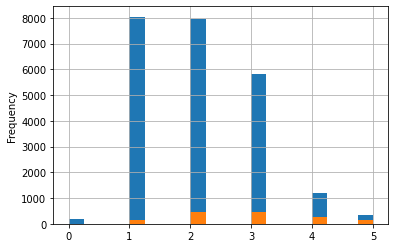

2.0
3.0


In [31]:
data['rooms'].plot(kind='hist', bins=20, grid=True); #комнаты
data.query('centre_km < 5')['rooms'].plot(kind='hist', bins=20, grid=True);
plt.show()
print(data['rooms'].median())
print(data.query('centre_km < 5')['rooms'].median())

Квартиры в центре в основном имеют 2-3 комнаты, когда в то же время в датасете преобладают квартиры с 1-2 комнатами.

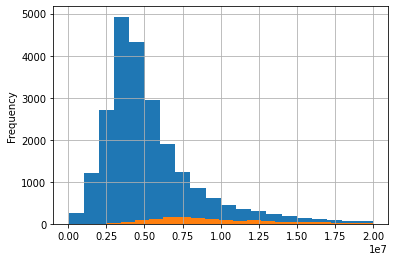

4550000.0
8750000.0


In [32]:
data['last_price'].plot(kind='hist', bins=20, grid=True); #цена
data.query('centre_km < 5')['last_price'].plot(kind='hist', bins=20, grid=True);
plt.show()
print(data['last_price'].median())
print(data.query('centre_km < 5')['last_price'].median())

Квартиры в центре в среднем дороже на 4 млн. 

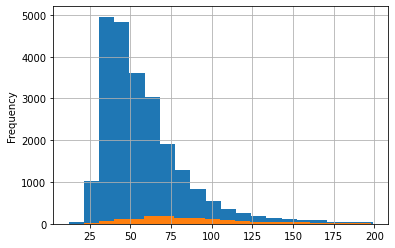

51.9
80.9


In [33]:
data['total_area'].plot(kind='hist', bins=20, grid=True); #площадь
data.query('centre_km < 5')['total_area'].plot(kind='hist', bins=20, grid=True);
plt.show()
print(data['total_area'].median())
print(data.query('centre_km < 5')['total_area'].median())

Квартиры в центре в среднем имеют больше площадь на 30 кв.м.

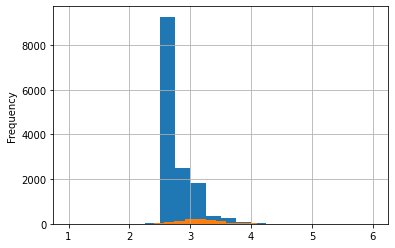

2.65
3.105


In [34]:
data['ceiling_height'].plot(kind='hist', bins=20, grid=True); #площадь
data.query('centre_km < 5')['ceiling_height'].plot(kind='hist', bins=20, grid=True);
plt.show()
print(data['ceiling_height'].median())
print(data.query('centre_km < 5')['ceiling_height'].median())

Квартиры в центре в среднем имеют выше потолки на 0,5 м.

Квартиры в центре Петербурга точно так же, как и все квартиры зависят от площади и количества комнат. При этом цена квартир растет с ростом этих параметров. Но при этом цена центральных квартир не зависит от близости к центру города. Квартиры на "других" этажах, а также на последнем этаже чаще имеют большую цену, чем квартиры на первом. Зависимости от даты продажи не наблюдаю.

## Общий вывод

В данном проекте были изучены проданные за несколько лет квартиры в Санкт-Петербурге и близлежащих к нему районах. Были найдены основные факторы, влияющие на цену квартиры, как в целом для набора данных, так и в частности для центра Санкт-Петербурга. Также было определено среднее время продажи квартиры и построены гистограммы для каждого основного фактора, определяющего квартиру.
Основными факторами влияющими на цену квартиры являются: площадь (корреляция 0,77), количество комнат (корреляция 0,49) и расстояние до центра близлежащего населенного пункта (корреляция -0,37), причем для первых двух пунктов цена растет прямо пропорционально, для последнего характерна обратная зависимость.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод